In [1]:
# DSC630-Project - Impact of Unemployment due to COVID19 on Household Debt and Payments at County level
# Lenin Kamma 06/28/2020

In [2]:
# Import libraries
import pandas as pd
import numpy as np

In [3]:
# Load unemployment data from csv file
# Create meaningful headers during load
# Use converter to keep leading zeroes
# Remove rows with all blanks
unemployment = pd.read_csv("C:/Lenin Data Science/DSC630/unemployment_data_bycounty1.csv",sep='|',header=None, na_values=[' ',''],names=['area_code','state_code','county_code','area','period','labor_force','employed','unempl_level','unempl_rate'],converters={'state_code': lambda x: str(x),'county_code':lambda x: str(x)})

In [4]:
# View unemployment data file
unemployment

,area_code,state_code,county_code,area,period,labor_force,employed,unempl_level,unempl_rate
0,CN0100100000000,01,001,"Autauga County, AL",Apr-19,"26,165","25,552",613,"2.3,,,"
1,CN0100300000000,01,003,"Baldwin County, AL",Apr-19,"97,486","95,092","2,394","2.5,,"
2,CN0100500000000,01,005,"Barbour County, AL",Apr-19,"8,428","8,152",276,"3.3,,,"
3,CN0100700000000,01,007,"Bibb County, AL",Apr-19,"8,650","8,403",247,"2.9,,,"
4,CN0100900000000,01,009,"Blount County, AL",Apr-19,"25,198","24,614",584,"2.3,,,"
...,...,...,...,...,...,...,...,...,...
43969,CN5603700000000,56,037,"Sweetwater County, WY",May-20(p),"21,157","19,097","2,060","9.7,,"
43970,CN5603900000000,56,039,"Teton County, WY",May-20(p),"15,045","12,786","2,259","15.0,,"
43971,CN5604100000000,56,041,"Uinta County, WY",May-20(p),"8,960","8,159",801,"8.9,,,"
43972,CN5604300000000,56,043,"Washakie County, WY",May-20(p),"3,795","3,525",270,"7.1,,,"


In [5]:
# Drop area_code column not used for analysis
unemployment.drop(columns="area_code", inplace=True)

In [6]:
# Find NA columns
unemployment.isna().sum()

state_code        0
county_code       0
area              0
period            0
labor_force       0
employed          0
unempl_level      0
unempl_rate     193
dtype: int64

In [7]:
# DROP rows where the value is NA for all variables
unemployment.dropna(inplace=True)

In [8]:
# Remove duplicate data if exists
unemployment[unemployment.duplicated()]

,state_code,county_code,area,period,labor_force,employed,unempl_level,unempl_rate


In [9]:
# None of the data rows are duplicated and have NA values in unemployment file

In [10]:
# Create FIPS code using state code and county code
unemployment["FIPS_code"] = unemployment['state_code'].astype(int) * 1000 + unemployment['county_code'].astype(int)

In [11]:
# Drop state code, county code, labor force and employed columns
unemployment.drop(columns=["state_code","county_code","labor_force","employed"], inplace=True)

In [12]:
# Remove all commas in numeric values
unemployment_final = unemployment.replace(',','', regex=True)

In [13]:
# Split period into month and year columns
unemployment_final[["month", "year"]] = unemployment_final["period"].str.split("-",expand=True)

In [14]:
# Drop period column
unemployment_final.drop(columns="period", inplace=True)

In [15]:
# View final unemployment file
unemployment_final

,area,unempl_level,unempl_rate,FIPS_code,month,year
0,Autauga County AL,613,2.3,1001,Apr,19
1,Baldwin County AL,2394,2.5,1003,Apr,19
2,Barbour County AL,276,3.3,1005,Apr,19
3,Bibb County AL,247,2.9,1007,Apr,19
4,Blount County AL,584,2.3,1009,Apr,19
...,...,...,...,...,...,...
43969,Sweetwater County WY,2060,9.7,56037,May,20(p)
43970,Teton County WY,2259,15.0,56039,May,20(p)
43971,Uinta County WY,801,8.9,56041,May,20(p)
43972,Washakie County WY,270,7.1,56043,May,20(p)


In [16]:
# Load household debt data
housedebt = pd.read_csv("C:/Lenin Data Science/DSC630/household_debt.csv")

In [17]:
# View household debt data
housedebt

,year,qtr,area_fips,low,high
0,1999,1,1001,1.82,2.16
1,1999,1,1003,1.82,2.16
2,1999,1,1005,0.00,0.78
3,1999,1,1007,2.63,3.46
4,1999,1,1009,2.16,2.63
...,...,...,...,...,...
263625,2019,4,56037,1.01,1.19
263626,2019,4,56039,1.58,1.82
263627,2019,4,56041,1.58,1.82
263628,2019,4,56043,1.82,2.16


In [18]:
# Drop debt data prior to 2019
housedebt = housedebt.drop(housedebt[housedebt['year'] < 2019].index)

In [19]:
# View housedebt dataframe
housedebt

,year,qtr,area_fips,low,high
251075,2019,1,1001,3.46,NaN
251076,2019,1,1003,2.63,3.46
251077,2019,1,1005,0.78,1.01
251078,2019,1,1007,1.82,2.16
251079,2019,1,1009,3.46,NaN
...,...,...,...,...,...
263625,2019,4,56037,1.01,1.19
263626,2019,4,56039,1.58,1.82
263627,2019,4,56041,1.58,1.82
263628,2019,4,56043,1.82,2.16


In [20]:
# Find NA rows
housedebt.isna().sum()

year            0
qtr             0
area_fips       0
low             0
high         1138
dtype: int64

In [21]:
# There are 1138 NA rows in the table with unknown high employment rate value
# Since low value is available for unemployment rate, replace high with low value
housedebt['high'] = np.where(housedebt['low'] == 0, housedebt['high'], housedebt['low'])

In [22]:
# View final housedebt data
housedebt

,year,qtr,area_fips,low,high
251075,2019,1,1001,3.46,3.46
251076,2019,1,1003,2.63,2.63
251077,2019,1,1005,0.78,0.78
251078,2019,1,1007,1.82,1.82
251079,2019,1,1009,3.46,3.46
...,...,...,...,...,...
263625,2019,4,56037,1.01,1.01
263626,2019,4,56039,1.58,1.58
263627,2019,4,56041,1.58,1.58
263628,2019,4,56043,1.82,1.82


In [23]:
# Find counts
unemployment_final["FIPS_code"].value_counts().sort_index()

1001     14
1003     14
1005     14
1007     14
1009     14
         ..
56037    14
56039    14
56041    14
56043    14
56045    14
Name: FIPS_code, Length: 3141, dtype: int64

In [24]:
# Replace provisional year to actual year
unemployment_final['year'].replace({"20(p) ":"20"}, inplace=True)

In [25]:
# Convert year to numeric column
unemployment_final["year"] = unemployment_final["year"].apply(pd.to_numeric)

In [26]:
# Convert 2 digit year to 4 digit year
unemployment_final["year"] = unemployment_final["year"].astype(int) + 2000

In [27]:
# Replace months by quarter numbers
unemployment_final["month"].replace({"   Jan":"1","   Feb":"1","   Mar":"1","   Apr":"2","   May":"2"," May":"2","   Jun":"2","   Jul":"3","   Aug":"3","   Sep":"3","   Oct":"4","   Nov":"4","   Dec":"4"}, inplace=True)

In [28]:
# View month data
unemployment_final["month"].unique()

array(['2', '3', '4', '1'], dtype=object)

In [29]:
# Remove extra spaces in the rate column
unemployment_final["unempl_rate"] = unemployment_final["unempl_rate"].str.lstrip()

In [30]:
# Remove dashes and replace with nulls
unemployment_final["unempl_rate"] = unemployment_final["unempl_rate"].str.replace("-","0.0")

In [31]:
# Convert string value to float
unemployment_final["unempl_rate"]= unemployment_final["unempl_rate"].astype(float)

In [32]:
# Take the mean of the unemployement rate for each quarter and rewrite it to a dataframe
mod_unempl = unemployment_final.groupby(['area','FIPS_code','year','month'])['unempl_rate'].mean().to_frame().reset_index()

In [33]:
# Import matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'Unemployment Rate')

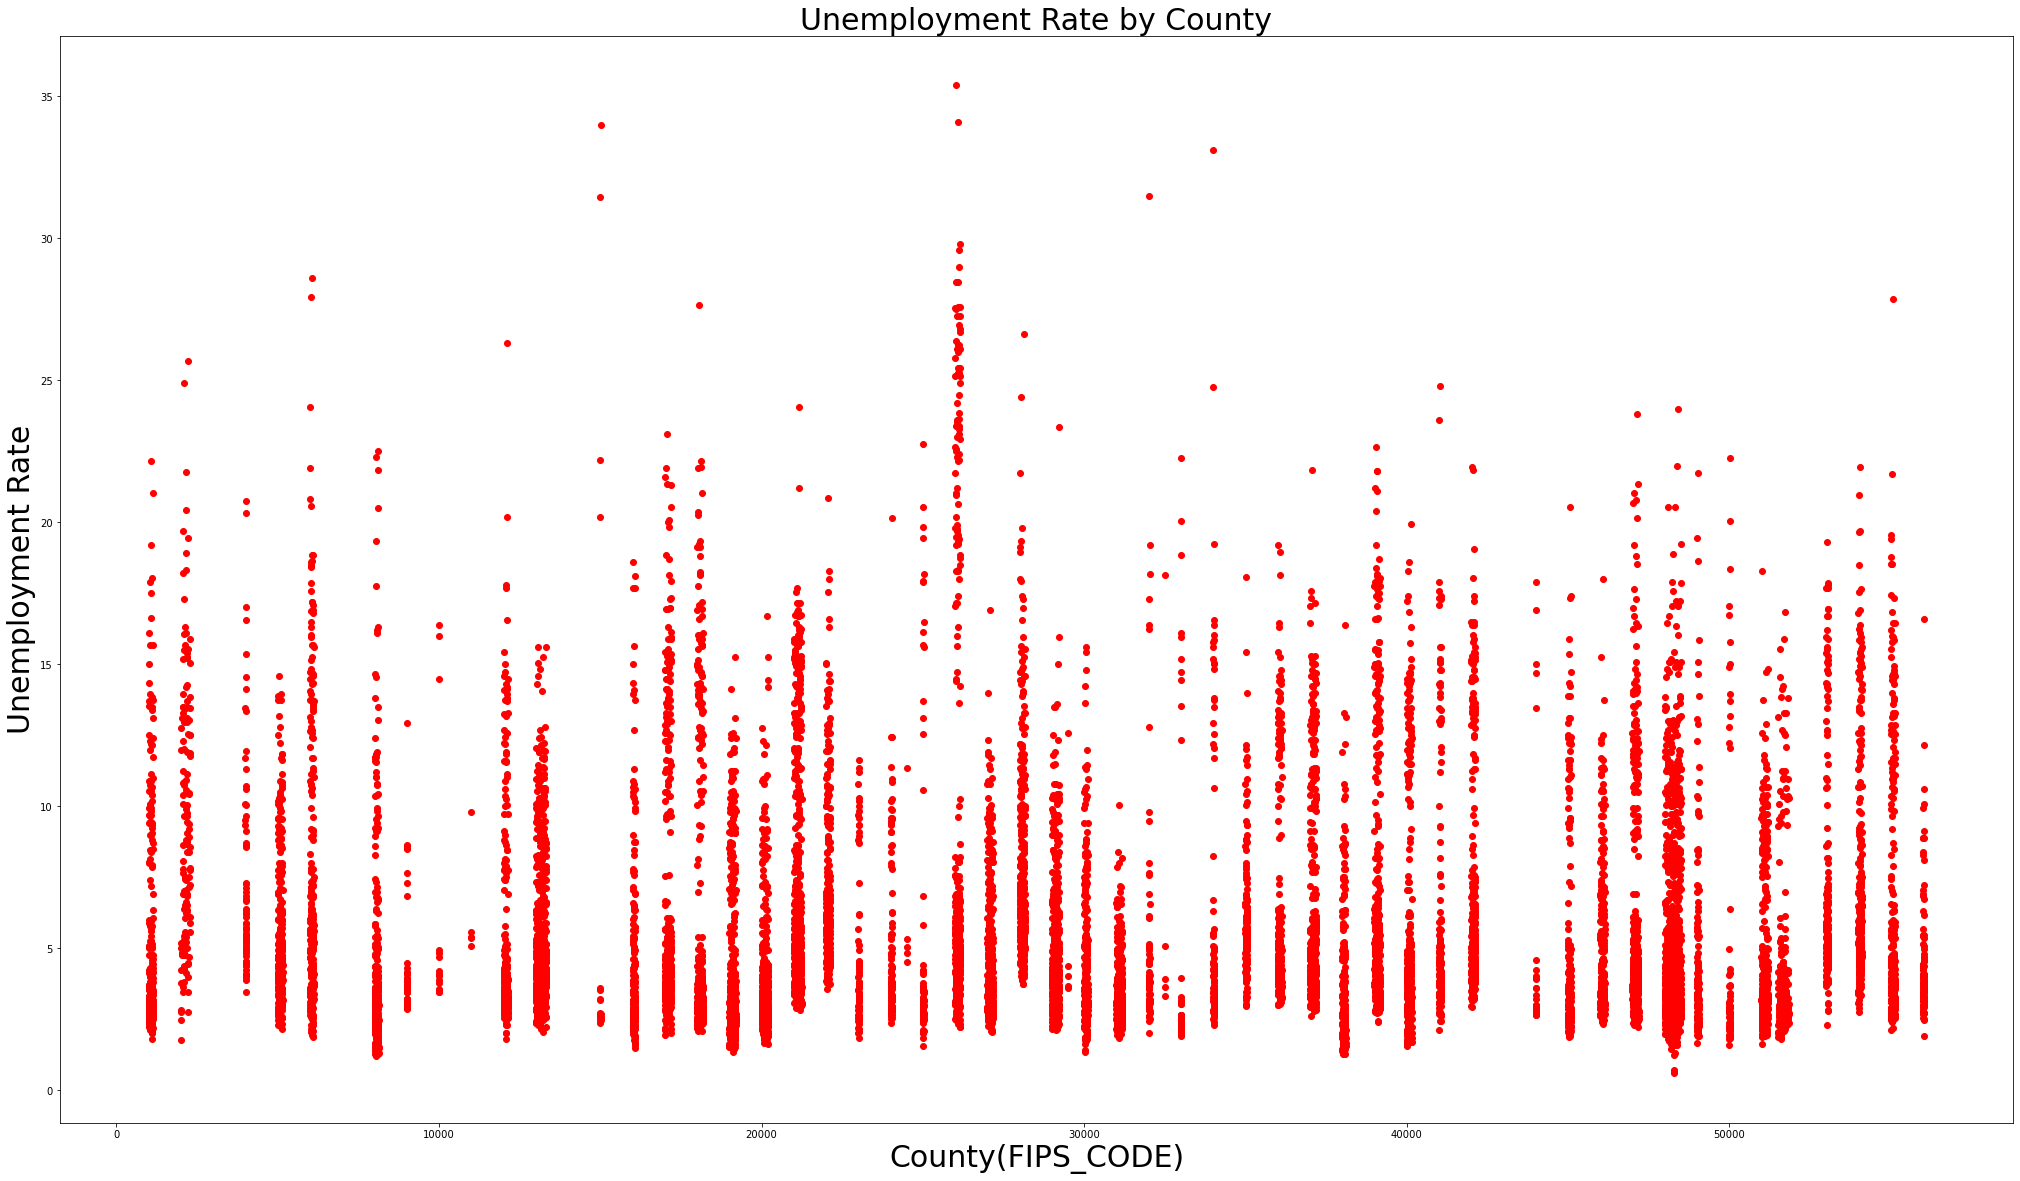

In [34]:
# Create a scatter plot with country on x-axis and unemployment rate on y-axis
fig = plt.figure(figsize=(35,20))
plt.scatter('FIPS_code', 'unempl_rate',data=mod_unempl, color='red')
plt.title('Unemployment Rate by County', fontsize=30 )
plt.xlabel('County(FIPS_CODE)', fontsize=30)
plt.ylabel('Unemployment Rate', fontsize=30)

Text(0, 0.5, 'Debt Rate')

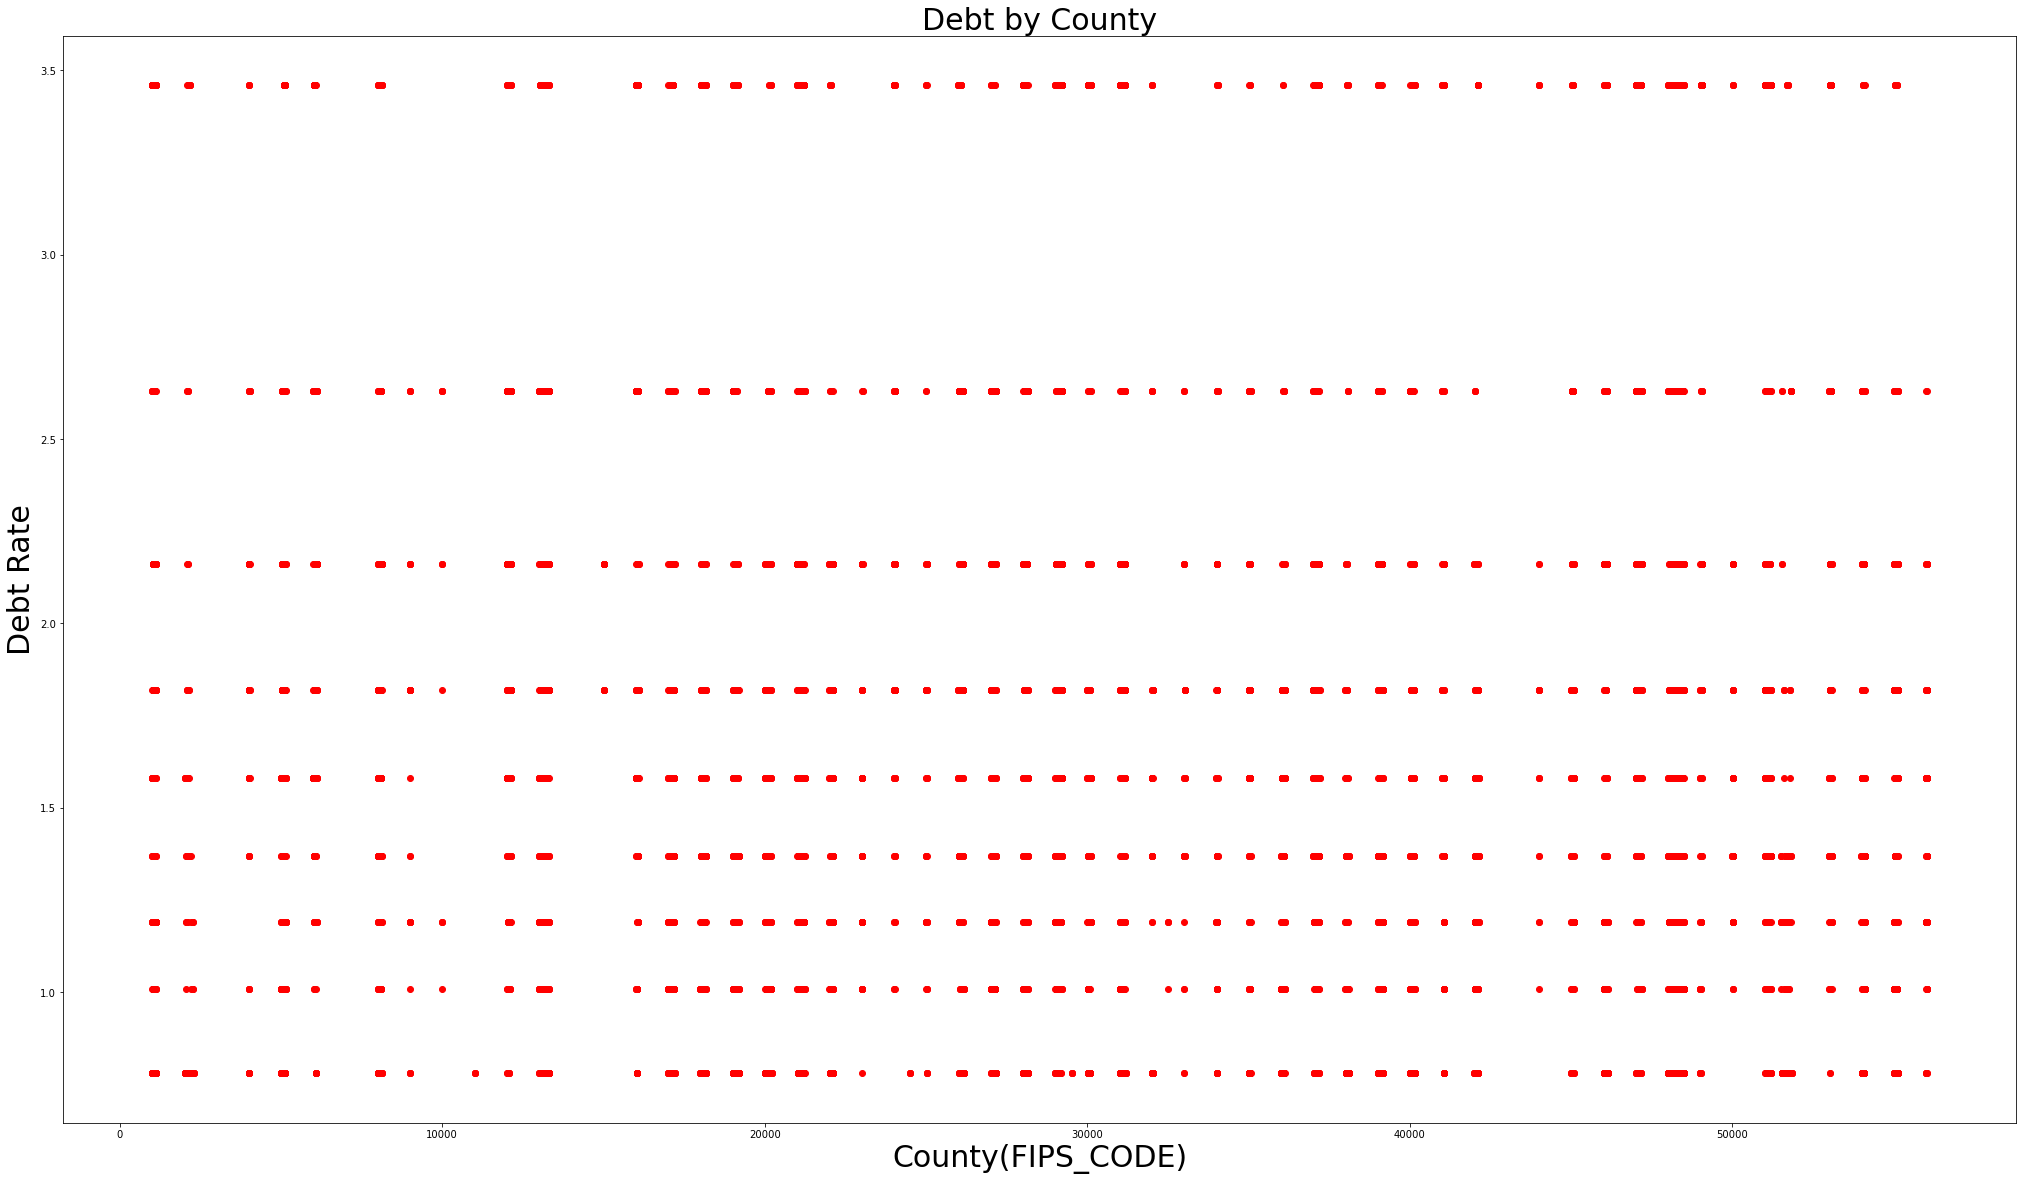

In [35]:
# Create a scatter plot with country on x-axis and unemployment rate on y-axis
fig = plt.figure(figsize=(35,20))
plt.scatter('area_fips','high', data=housedebt, color='red')
plt.title('Debt by County', fontsize=30 )
plt.xlabel('County(FIPS_CODE)', fontsize=30)
plt.ylabel('Debt Rate', fontsize=30)

In [36]:
# Take top 100 rows with unemployment  in 2019
mod_unempl_top100_2019 = mod_unempl[mod_unempl["year"] == 2019].nlargest(100, 'unempl_rate')[['area','unempl_rate','FIPS_code']]

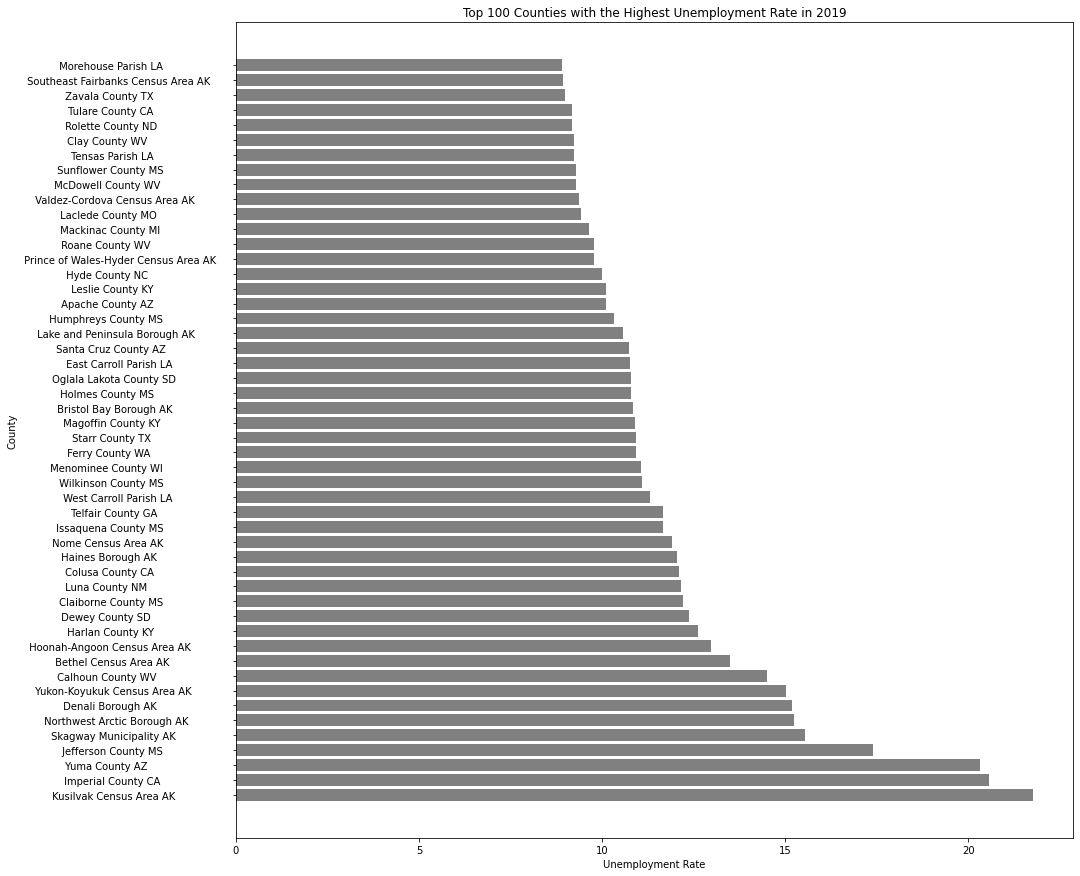

In [37]:
# Create a bar chart with county and unemployment in 2019
fig, ax = plt.subplots(figsize=(15,15))
ax.barh(data=mod_unempl_top100_2019, y='area',width='unempl_rate',color='gray')
plt.ylabel('County')
plt.xlabel('Unemployment Rate')
plt.title('Top 100 Counties with the Highest Unemployment Rate in 2019')
plt.show()

In [38]:
# Take top 100 rows with unemployment  in 2019
mod_unempl_top100_2020 = mod_unempl[mod_unempl["year"] == 2020].nlargest(100, 'unempl_rate')[['area','unempl_rate','FIPS_code']]

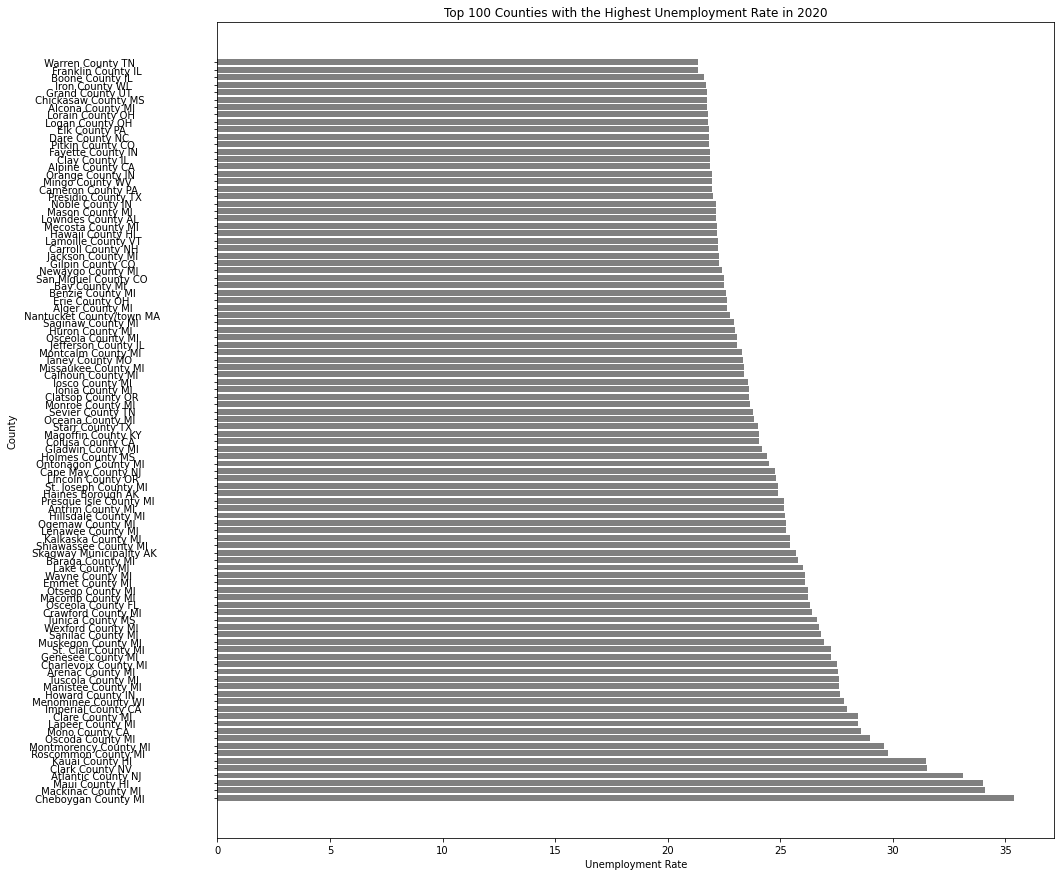

In [39]:
# Create a bar chart with county and unemployment in 2019
fig, ax = plt.subplots(figsize=(15,15))
ax.barh(data=mod_unempl_top100_2020, y='area',width='unempl_rate',color='gray')
plt.ylabel('County')
plt.xlabel('Unemployment Rate')
plt.title('Top 100 Counties with the Highest Unemployment Rate in 2020')
plt.show()

In [40]:
# Take top 100 rows with unemployment in 2020# Take top 100 rows with unemployment  in 2019
mod_unempl_top100_2020 = mod_unempl[mod_unempl["year"] == 2020].nlargest(100, 'unempl_rate')[['area','unempl_rate','FIPS_code']]

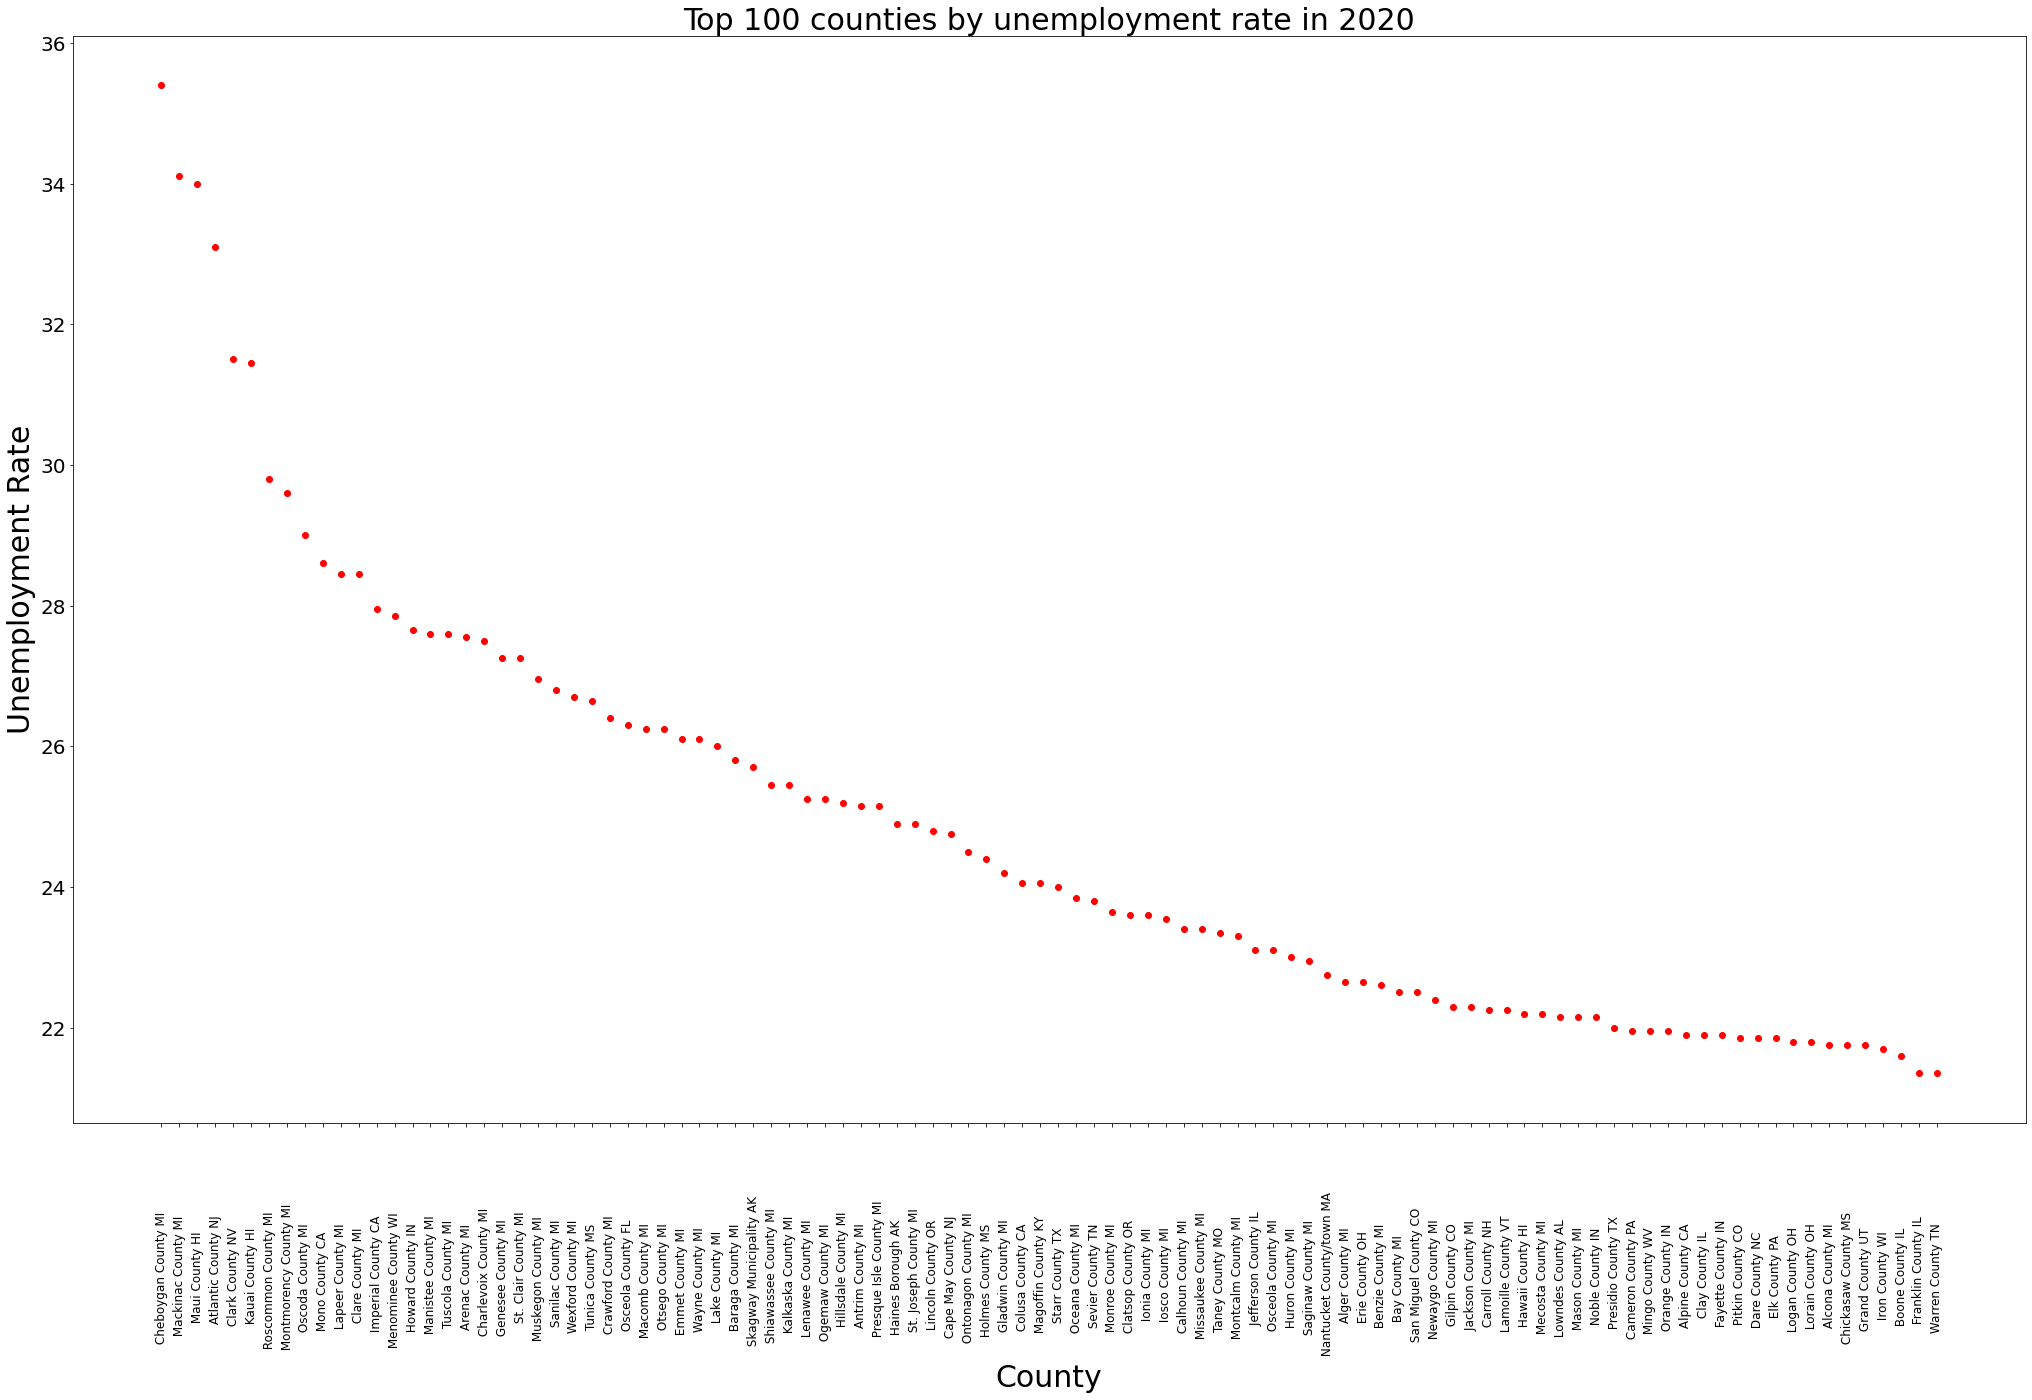

In [41]:
# Create a scatter plot with county on x-axis and unemployment rate on y-axis
fig = plt.figure(figsize=(35,20))
plt.scatter('area', 'unempl_rate',data=mod_unempl_top100_2020, color='red')
plt.title('Top 100 counties by unemployment rate in 2020', fontsize=30 )
plt.xlabel('County', fontsize=30)
plt.ylabel('Unemployment Rate', fontsize=30)

# Rotate xticks to show vertical
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=20)
plt.show()

In [42]:
# house hold debt data for 2019
housedebt_2019 = housedebt[housedebt["year"] == 2019]

In [43]:
# house hold debt data for quarter-4
housedebt_2019 = housedebt[housedebt["qtr"] == 4]

In [44]:
# top 100 house hold debt data rows 
housedebt_top100 = housedebt_2019.nlargest(100, 'high')[['area_fips','high']]

In [45]:
# Drop duplicates
housedebt_top100.drop_duplicates()

,area_fips,high
260491,1001,3.46
260495,1009,3.46
260516,1051,3.46
260548,1115,3.46
260566,2100,3.46
...,...,...
261592,21219,3.46
261594,21223,3.46
261613,22021,3.46
261634,22063,3.46


In [46]:
# Join top 25 debt counties to get the county name
housedebt_top100_name = pd.merge(housedebt_top100, mod_unempl, left_on='area_fips', right_on='FIPS_code',how='inner')[['area','high']]

In [47]:
housedebt_top100_name.drop_duplicates()

,area,high
0,Autauga County AL,3.46
5,Blount County AL,3.46
10,Elmore County AL,3.46
15,St. Clair County AL,3.46
20,Haines Borough AK,3.46
...,...,...
475,Todd County KY,3.46
480,Trimble County KY,3.46
485,Caldwell Parish LA,3.46
490,Livingston Parish LA,3.46


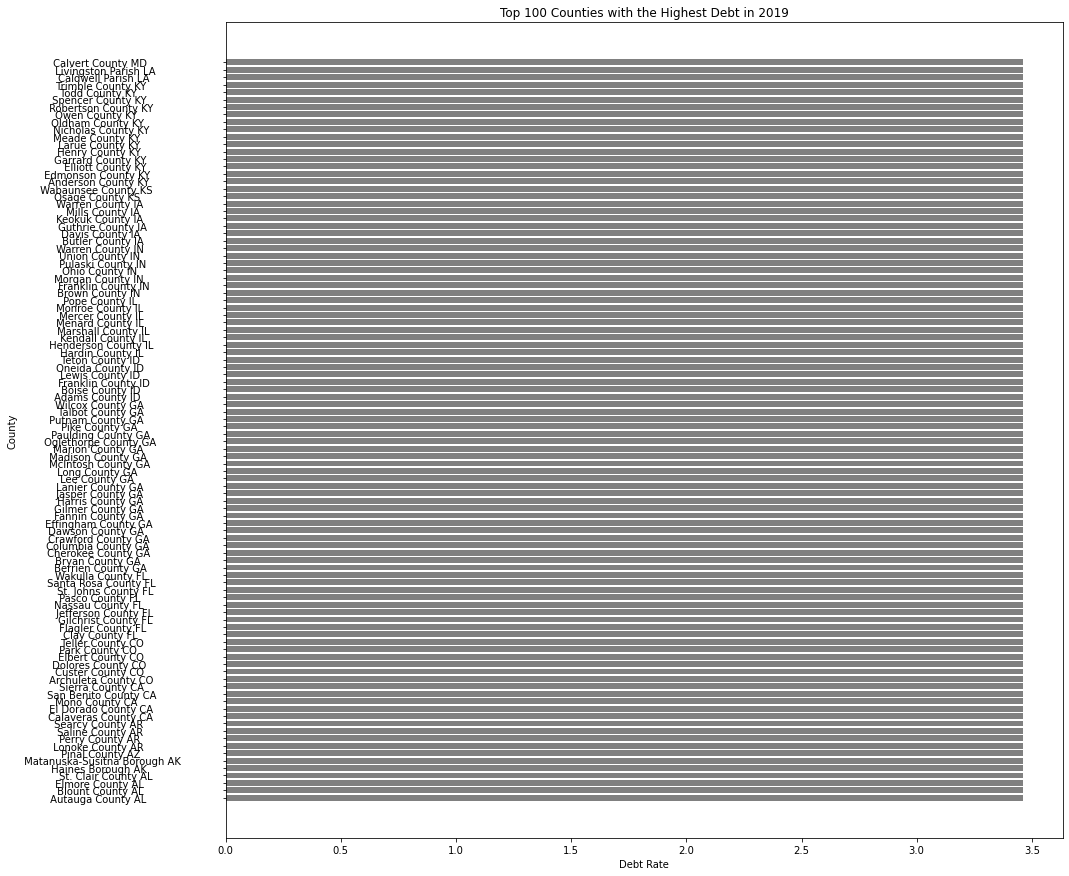

In [48]:
# Create a bar chart with county and debt
fig, ax = plt.subplots(figsize=(15,15))
ax.barh(data=housedebt_top100_name, y='area',width='high',color='gray')
plt.ylabel('County')
plt.xlabel('Debt Rate')
plt.title('Top 100 Counties with the Highest Debt in 2019')
plt.savefig('C:/Lenin Data Science/DSC630/Bar1.pdf', dpi=1200)
plt.show()

In [49]:
# remove duplciates from housedebt 2019 quarter 4 data
housedebt_2019 = housedebt_2019.drop_duplicates()

In [50]:
# Join to get the county name, area, and area_fips for top 100 counties
housedebt_2019 = pd.merge(housedebt_top100, mod_unempl, left_on='area_fips', right_on='FIPS_code',how='inner')[['area_fips','area','high']]

In [51]:
# Drop duplicates
housedebt_2019.drop_duplicates(inplace=True)

In [52]:
# Final Merged Dataframe-1 
# This dataframe shows the counties that are common in both debt file and unemployment file
Final_merged_df1 = pd.merge(left=housedebt_2019,right=mod_unempl_top100_2019,how='inner', left_on ='area_fips', right_on='FIPS_code')

In [53]:
# View
Final_merged_df1

,area_fips,area_x,high,area_y,unempl_rate,FIPS_code
0,2100,Haines Borough AK,3.46,Haines Borough AK,12.033333,2100


In [54]:
# Only one county in top100 unemployment counties is found in top100 counties with debt
# This means there is no correlation between unemployment and debt

In [55]:
# Take top 1000 counties with unemployment data in 2019 and 2020
# Merge 2019 unemployment dataframe with 2020 unemployment dataframe for top 1000 counties
mod_unempl_top1000_2019 = mod_unempl[mod_unempl["year"] == 2019].nlargest(500, 'unempl_rate')[['area','unempl_rate','FIPS_code','year']]
mod_unempl_top1000_2020 = mod_unempl[mod_unempl["year"] == 2020].nlargest(500, 'unempl_rate')[['area','unempl_rate','FIPS_code','year']]

In [56]:
# Create the mean of unemployment rate in 2019 for top 1000 counties

mod_unempl_top1000_2019 = mod_unempl_top1000_2019.groupby(['area','FIPS_code','year'])['unempl_rate'].mean().to_frame().reset_index()
mod_unempl_top1000_2020 = mod_unempl_top1000_2020.groupby(['area','FIPS_code','year'])['unempl_rate'].mean().to_frame().reset_index()

In [57]:
unemployment_compare = pd.merge(left=mod_unempl_top1000_2020,right=mod_unempl_top1000_2019,how='inner', left_on ='FIPS_code', right_on='FIPS_code')

<function matplotlib.pyplot.show(*args, **kw)>

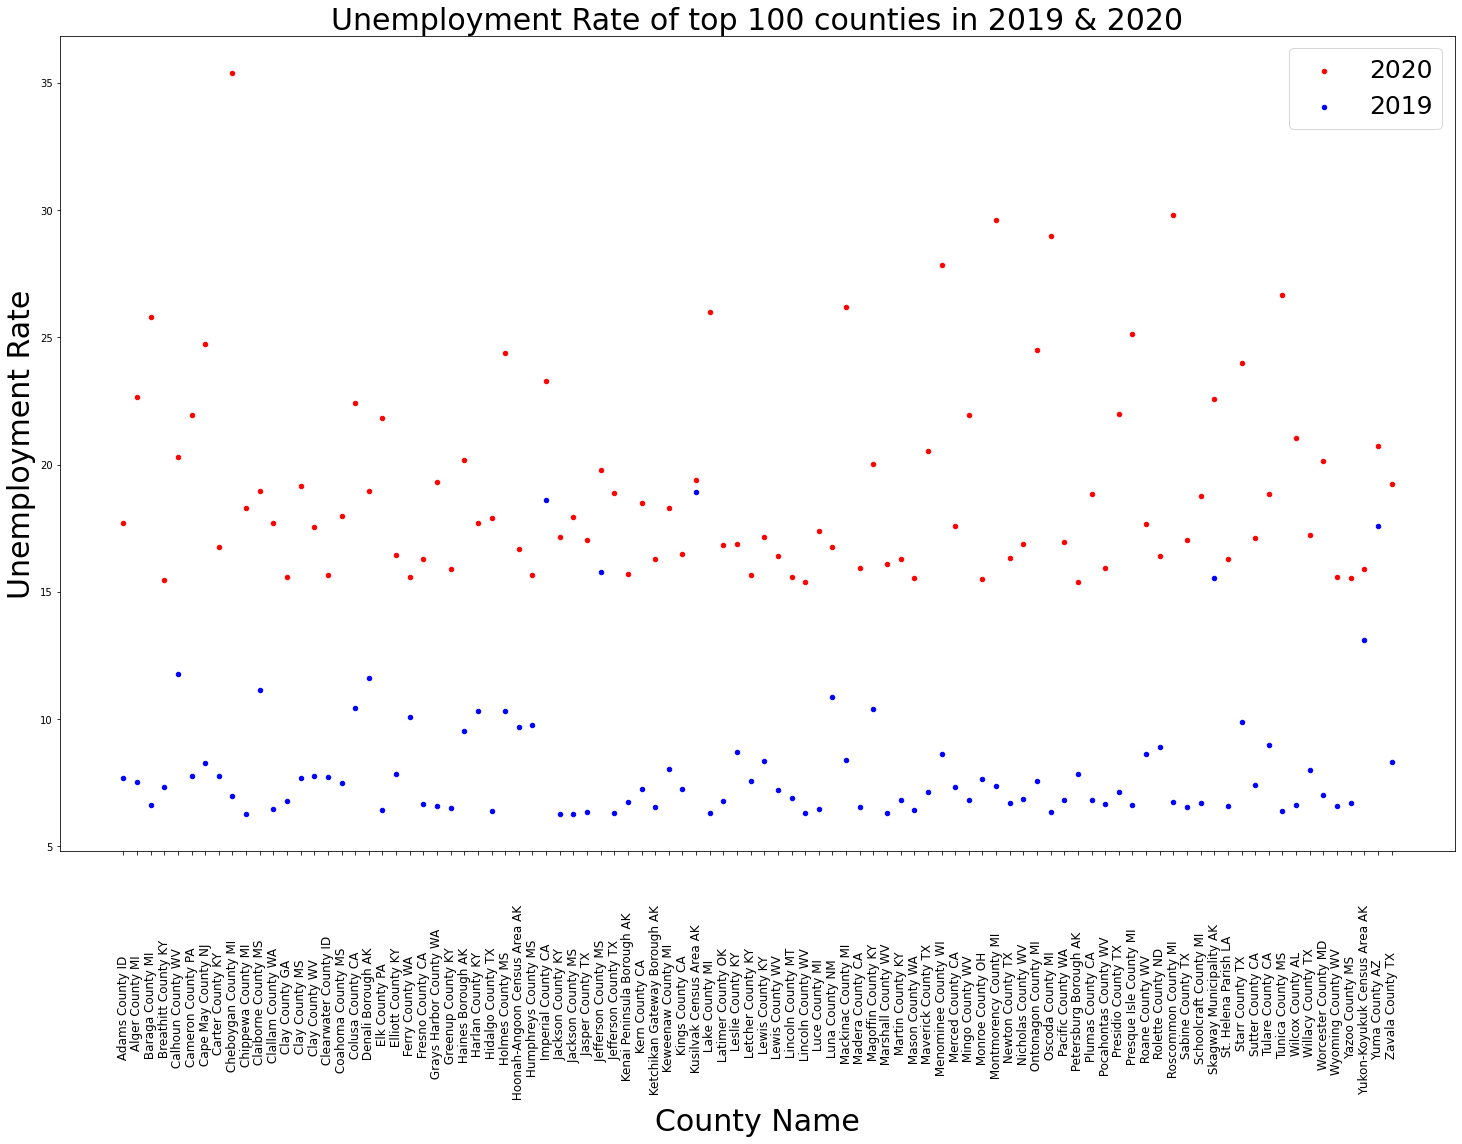

In [58]:
# scatter plot of unemployment rate in 2019 and 2020 for top 1000 counties
ax = unemployment_compare.reset_index().plot(kind='scatter', x='area_x', y='unempl_rate_x',
                                           color='Red', label='2020',)

unemployment_compare.reset_index().plot(kind='scatter', x='area_x', y='unempl_rate_y',
                                          color='Blue', label='2019', ax=ax, figsize=(25,15))
plt.legend(loc=0, prop={'size': 25})
plt.xticks(rotation=90, fontsize=12)
plt.title('Unemployment Rate of top 100 counties in 2019 & 2020', fontsize=30 )
plt.xlabel('County Name', fontsize=30)
plt.ylabel('Unemployment Rate', fontsize=30)
plt.show


In [59]:
# Average house hold debt of top 100 counties 
housedebt_mean = housedebt.groupby("area_fips").mean().reset_index()

In [60]:
# Create a new dataframe with area fips and high columns
housedebt_areamn = housedebt_mean[['area_fips','high']]

In [61]:
housedebt_areamn

,area_fips,high
0,1001,3.4600
1,1003,2.6300
2,1005,0.7800
3,1007,1.6400
4,1009,3.4600
...,...,...
3134,56037,1.1000
3135,56039,1.1975
3136,56041,1.5800
3137,56043,1.8200


In [65]:
mod_unempl_mean_2019 = mod_unempl_top1000_2019 = mod_unempl[mod_unempl["year"] == 2019][['area','unempl_rate','FIPS_code','year']]

In [66]:
mod_unempl_mean_2019['FIPS_code'].mean()[['unempl_rate']]

C:\Users\Supernova\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: invalid index to scalar variable.

In [67]:
mod_unempl_mean_2019

,area,unempl_rate,FIPS_code,year
0,Abbeville County SC,3.200000,45001,2019
1,Abbeville County SC,3.166667,45001,2019
2,Abbeville County SC,3.000000,45001,2019
5,Acadia Parish LA,5.033333,22001,2019
6,Acadia Parish LA,5.733333,22001,2019
...,...,...,...,...
15640,Zavala County TX,9.000000,48507,2019
15641,Zavala County TX,8.100000,48507,2019
15644,Ziebach County SD,5.666667,46137,2019
15645,Ziebach County SD,7.000000,46137,2019


In [68]:
# Merge dataframes to prepare final dataframe for PCA
final_dataframe = pd.merge(left=mod_unempl_mean_2019,right=housedebt_areamn,how='inner', left_on ='FIPS_code', right_on='area_fips')[['FIPS_code','high','unempl_rate']]

<function matplotlib.pyplot.show(*args, **kw)>

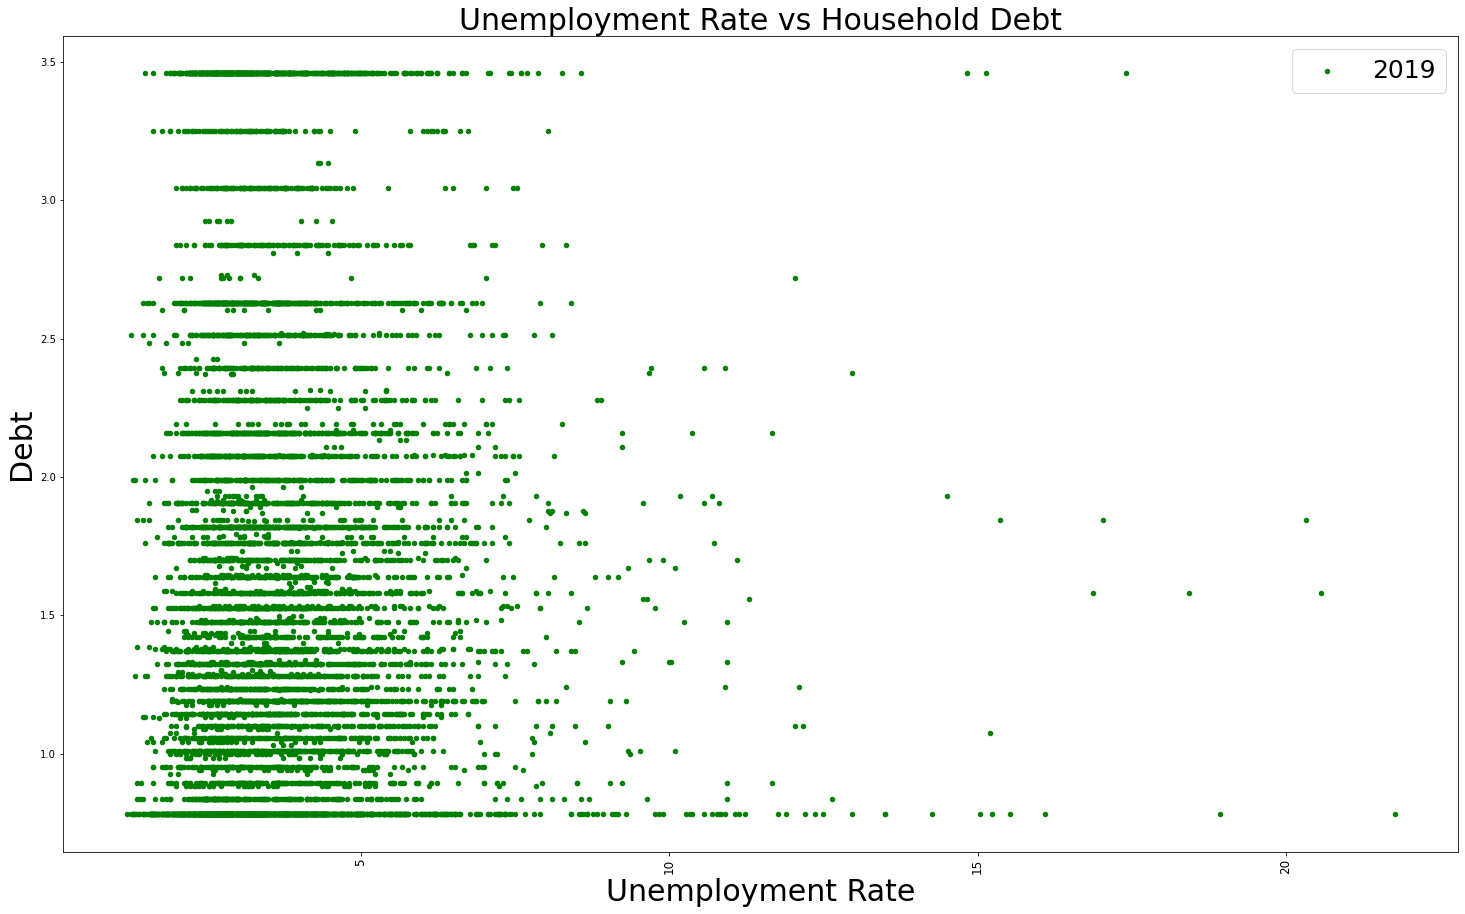

In [69]:
# scatter plot of unemployment rate in 2019 and 2020 for top 1000 counties
ax = final_dataframe.reset_index().plot(kind='scatter', x='unempl_rate', y='high',
                                           color='green', label='2019',figsize=(25,15))
plt.legend(loc=0, prop={'size': 25})
plt.xticks(rotation=90, fontsize=12)
plt.title('Unemployment Rate vs Household Debt', fontsize=30 )
plt.xlabel('Unemployment Rate', fontsize=30)
plt.ylabel('Debt', fontsize=30)
plt.show

In [70]:
# Correlation Matrix
import scipy.stats
np.corrcoef(final_dataframe["unempl_rate"], final_dataframe["high"])

array([[ 1.        , -0.02800926],
       [-0.02800926,  1.        ]])

In [71]:
# Pearson and Spearman's coefficients
scipy.stats.pearsonr(final_dataframe["unempl_rate"], final_dataframe["high"])    # Pearson's r

(-0.028009257637667588, 0.0066556148996304776)

In [72]:
scipy.stats.spearmanr(final_dataframe["unempl_rate"], final_dataframe["high"])   # Spearman's rho

SpearmanrResult(correlation=0.016740407712785045, pvalue=0.1048794125727733)

In [ ]:
# Counties with lowest unemployment rate
mod_unempl_bottom500_2019 = mod_unempl[mod_unempl["year"] == 2019].nsmallest(500, 'unempl_rate')[['area','unempl_rate','FIPS_code','year']]

In [ ]:
# Counties with lowest unemployment rate
mod_unempl_bottom500_2019